<a href="https://colab.research.google.com/github/PedroTricossi/Algoritmos-I---UFPR/blob/master/Ex02_prova_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Professor, eu fiz esse notebook pois durante a prova fiquei pensando se o exercicio numero 2 poderia ser resolvido utilizando uma inteligencia artificial. E como veremos logo, a resposta é **não tão bem**.

### Mas vou te explicar o que eu fiz, quem sabe possa ter alguma ideia de fazer melhor.



---



Em primeiro lugar eu importei as bibliotecas.



*   tensorflow é uma biblioteca feito pela google, especificamente para deep learning.
*   numpy é um biblioteca para manipulação matemática em python, que vacilita muito o trabalho com matrizes numéricas. 





In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import logging

logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [3]:
def previsao_modelo_1():
  teste_1 = int(model.predict([555.0]))
  teste_2 = int(model.predict([102.0]))
  teste_3 = int(model.predict([52.0]))

  print(f'A previsão para o 555 é: {teste_1}')
  print(f'A previsão para o 102 é: {teste_2}')
  print(f'A previsão para o 52 é: {teste_3}')

In [4]:
def previsao_modelo_2():
  teste_1 = int(model_2.predict([555.0]))
  teste_2 = int(model_2.predict([102.0]))
  teste_3 = int(model_2.predict([52.0]))

  print(f'A previsão para o 555 é: {teste_1}')
  print(f'A previsão para o 102 é: {teste_2}')
  print(f'A previsão para o 52 é: {teste_3}')



---



Minha primeira idea foi utilizar apenas os exemplos que foram dados na prova para ver como o modelo iria reagir e como seriam os resultados.

In [5]:
entrada_q    = np.array([719, 1,  15, 110,  0],  dtype=float)
saida_a = np.array([53, 1, 7, 8, 0],  dtype=float)

for i,c in enumerate(entrada_q):
  print(f"o numero {c} em UMC, pode ser representado em decimal como {saida_a[i]}")

o numero 719.0 em UMC, pode ser representado em decimal como 53.0
o numero 1.0 em UMC, pode ser representado em decimal como 1.0
o numero 15.0 em UMC, pode ser representado em decimal como 7.0
o numero 110.0 em UMC, pode ser representado em decimal como 8.0
o numero 0.0 em UMC, pode ser representado em decimal como 0.0


O primeiro modelo que eu montei foi um simples perceptron, uma rede neural de uma camada, e como forma de avalição usei o mais basico, MSE.

In [6]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [7]:
history = model.fit(entrada_q, saida_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


Esse grafico mostra a magnitude do erro, conforme o modelo é treinado e como podemos ver o erro aparentemente chegou a 0 perto depois dos 50 primeiras rodadas de treino, mas posteriormente veremos o motivo de ter usado 500.

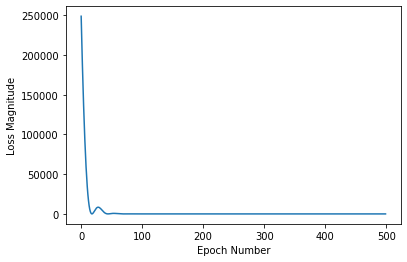

In [8]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

Com os resultados do primiero modelo começamos a perceber o problema, os resultados estão um tanto quanto longe da realidade.



*   O correto para 555 seria 45.
*   O correto para 102 seria 8.
*   O correto para 52 seria 12. (O numero mais preocupante)







---



In [9]:
previsao_modelo_1()

A previsão para o 555 é: 41
A previsão para o 102 é: 7
A previsão para o 52 é: 4




---



Por conta do erro no ultimo numero pensei que talvez o problema fosse devido a o perceptron ser um modelo simples e por conta disso resolvi fazer outro um pouco mais complexo.

Dessa vez o modelo possui 4 neuronios de entrada, 4 escondidos, e 1 de saida.

In [10]:
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(units=4, input_shape=[1]),
  tf.keras.layers.Dense(units=4),
  tf.keras.layers.Dense(units=1)
])

In [11]:
model_2.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

In [12]:
model_2.fit(entrada_q, saida_a, epochs=500, verbose=False)



---



E mesmo tendo uma melhora, ainda não é bom o suficiente, principalmente para o terceiro numero.

In [13]:
previsao_modelo_2()

A previsão para o 555 é: 41
A previsão para o 102 é: 9
A previsão para o 52 é: 5




---



Portanto pensei que o problema pudesse ser devivo a falta de dados para o treinamento das redes, e por conta disso reoslvi adicionar mais alguns numeros para o treinamento

In [14]:
entrada_q    = np.array([719, 700, 682, 630, 540, 505, 479, 453, 399, 333, 247, 200, 77, 23, 12, 3, 1,  15, 110,  0],  dtype=float)
saida_a = np.array([53, 42, 54, 42, 38, 35, 47, 37, 45, 27, 27, 12, 21, 7, 4, 3, 1, 7, 8, 0],  dtype=float)

for i,c in enumerate(entrada_q):
  print(f"o numero {c} em UMC, pode ser representado em decimal como {saida_a[i]}")

o numero 719.0 em UMC, pode ser representado em decimal como 53.0
o numero 700.0 em UMC, pode ser representado em decimal como 42.0
o numero 682.0 em UMC, pode ser representado em decimal como 54.0
o numero 630.0 em UMC, pode ser representado em decimal como 42.0
o numero 540.0 em UMC, pode ser representado em decimal como 38.0
o numero 505.0 em UMC, pode ser representado em decimal como 35.0
o numero 479.0 em UMC, pode ser representado em decimal como 47.0
o numero 453.0 em UMC, pode ser representado em decimal como 37.0
o numero 399.0 em UMC, pode ser representado em decimal como 45.0
o numero 333.0 em UMC, pode ser representado em decimal como 27.0
o numero 247.0 em UMC, pode ser representado em decimal como 27.0
o numero 200.0 em UMC, pode ser representado em decimal como 12.0
o numero 77.0 em UMC, pode ser representado em decimal como 21.0
o numero 23.0 em UMC, pode ser representado em decimal como 7.0
o numero 12.0 em UMC, pode ser representado em decimal como 4.0
o numero 3.0 em



---



Usei os mesmo modelos da primeira parte para serem treinados com mais dados.

In [15]:
history = model.fit(entrada_q, saida_a, epochs=500, verbose=False)

In [16]:
history_2 = model_2.fit(entrada_q, saida_a, epochs=500, verbose=False)



---



Dessa vez o modelo 1 demorou as 500 iterações conseguir chegar a 0 de erro e o segundo por algum motivo chegou perto de 100. 

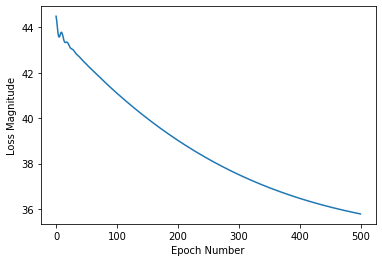

In [17]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

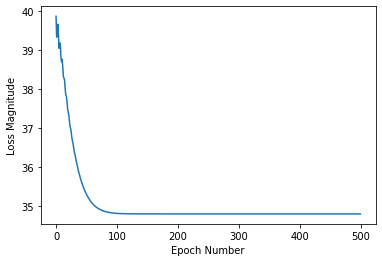

In [18]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history_2.history['loss'])



---



E como podemos ver, tivemos uma pequena melhora nos primeiro e no terceiro numero, mas uma piora no terceiro, principalmente no segundo modelo.

In [19]:
previsao_modelo_1()

A previsão para o 555 é: 42
A previsão para o 102 é: 10
A previsão para o 52 é: 7


In [20]:
previsao_modelo_2()

A previsão para o 555 é: 42
A previsão para o 102 é: 11
A previsão para o 52 é: 8


Depois dessa analise superficial, pude notar alguns problemas, a primeira é que o o modelo está sofrendo overfitting, ou seja, o modelo se adapta bem demais para os dados de treino, mas não generaliza bem para os dados de teste. Esse problema pode ser corrigido com mais dados.

Outro problema é que os dois modelos usados são um tanto quanto simples, então se modelos mais complexos fossem utilizados, possivelmente os resultados seriam melhores. Outras arquiteturas de redes neurais também poderiam ser usadas para melhorar os resultados.

Mas como eu resolvi fazer isso só como uma brincadeira para ver se era possivel criar algo desse tipo, não vou fazer isso agora, mas quem sabe faça quando acabarem as aulas.

PS: Esqueci de travar os resultados das redes neurais, então quando o git executar o código, alguns resultados podem ser diferentes do que está escrito.